In [246]:
import os
from glob import glob
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import re
import random
from tqdm import tqdm
import io

In [172]:
random.seed(314) # 乱数シードを314に設定

In [173]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.display.max_colwidth = 100

In [174]:
files = glob('dataset_tezuka_folder/**/*.jpg', recursive=True)

In [175]:
a = glob('dataset_tezuka_folder/**/*.jpg', recursive=True)

In [176]:
file_main = [s for s in a if 'メイン' in s]
file_regular = [s for s in a if 'レギュラー' in s]
file_guest = [s for s in a if 'ゲスト' in s]
file_mob = [s for s in a if 'モブ' in s]

In [177]:
len(glob('dataset_tezuka_folder/*'))

33

In [178]:
main= []
for i in file_main:
    main.append(os.path.splitext(os.path.basename(i))[0])

In [179]:
regular = []
for i in file_regular:
    regular.append(os.path.splitext(os.path.basename(i))[0])

In [180]:
guest = []
for i in file_guest:
    guest.append(os.path.splitext(os.path.basename(i))[0])

In [181]:
mob = []
for i in file_mob:
    mob.append(os.path.splitext(os.path.basename(i))[0])

In [182]:
len(a) , len(main) , len(regular) , len(guest) , len(mob) 

(12073, 3407, 2502, 2719, 3445)

In [183]:
main_name = []
for i in main:
    main_name.append(i.split('_')[0])

In [184]:
main_name = list(set(main_name))
len(main_name)

28

In [185]:
regular_name = []
for i in regular:
    regular_name.append(i.split('_')[0])

In [186]:
regular_name = list(set(regular_name))

In [187]:
len(set(regular_name))

82

In [188]:
guest_name = []
for i in guest:
    guest_name.append(i.split('_')[0])

In [189]:
guest_name = list(set(guest_name))

In [190]:
len(list(set(guest_name))) 

234

In [191]:
mob_name = []
for i in mob:
    mob_name.append(i.split('_')[0])

In [192]:
mob_name = list(set(mob_name))

In [193]:
len(list(set(mob_name))) 

189

In [230]:
# 1キャラにつき5画像
main_sample = []
for n in main_name:
    random.seed(0)
    main_sample += random.sample([s for s in files if n in s],5)

In [201]:
28 * 5 , len(main_sample)

(140, 140)

In [214]:
# 1キャラにつき2画像(2枚なけれれば1枚)
regular_sample = []
for n in regular_name:
    regular_file = [s for s in files if n in s]
    if len(regular_file) > 1:
        random.seed(0)
        regular_sample += random.sample(regular_file,2)
    else:
        random.seed(0)
        regular_sample += random.sample(regular_file,1)

In [217]:
len(regular_sample)

161

In [218]:
# 1キャラにつき1画像
guest_sample = []
for n in guest_name:
    guest_file = [s for s in files if n in s]
    random.seed(0)
    guest_sample += random.sample(guest_file,1)

In [219]:
len(guest_sample)

234

In [221]:
random.seed(0)
mob_sample = random.sample(file_mob,100)

In [223]:
len(mob_sample)

100

In [232]:
tezuka_sample = main_sample + regular_sample + guest_sample + mob_sample

In [234]:
len(tezuka_sample)

635

In [235]:
tezuka_sample

['dataset_tezuka_folder/地球を呑む/メイン/男/関五本松/関五本松_00015.jpg',
 'dataset_tezuka_folder/地球を呑む/メイン/男/関五本松/関五本松_00025.jpg',
 'dataset_tezuka_folder/地球を呑む2巻/メイン/男/関五本松/関五本松_00019.jpg',
 'dataset_tezuka_folder/地球を呑む/メイン/男/関五本松/関五本松_00161.jpg',
 'dataset_tezuka_folder/地球を呑む/メイン/男/関五本松/関五本松_00108.jpg',
 'dataset_tezuka_folder/人間昆虫記1/メイン/女/十村十枝子/十村十枝子_00007.jpg',
 'dataset_tezuka_folder/人間昆虫記1/メイン/女/十村十枝子/十村十枝子_00020.jpg',
 'dataset_tezuka_folder/人間昆虫記2/メイン/女/十村十枝子/十村十枝子_00050.jpg',
 'dataset_tezuka_folder/人間昆虫記1/メイン/女/十村十枝子/十村十枝子_00037.jpg',
 'dataset_tezuka_folder/人間昆虫記1/メイン/女/十村十枝子/十村十枝子_00023.jpg',
 'dataset_tezuka_folder/MT348_プライム・ローズ1巻/メイン/女/エミヤ/エミヤ_00009.jpg',
 'dataset_tezuka_folder/MT348_プライム・ローズ1巻/メイン/女/エミヤ/エミヤ_00082.jpg',
 'dataset_tezuka_folder/MT350プライム・ローズ3巻/メイン/女/エミヤ/エミヤ_00009.jpg',
 'dataset_tezuka_folder/MT348_プライム・ローズ1巻/メイン/女/エミヤ/エミヤ_00010.jpg',
 'dataset_tezuka_folder/MT349_プライム・ローズ2巻/メイン/女/エミヤ/エミヤ_00032.jpg',
 'dataset_tezuka_folder/サロメの唇\u3000IL２巻に掲載/メイン/男/倉敷/倉敷_0001

In [260]:
[s for s in tezuka_sample if '動物' in s]

['dataset_tezuka_folder/ふしぎなメルモ/ゲスト/動物/ネズミの天使72号/ネズミの天使72号_00004.jpg',
 'dataset_tezuka_folder/ふしぎなメルモ/ゲスト/動物/カエルの天使73号/カエルの天使73号_00004.jpg',
 'dataset_tezuka_folder/MT350プライム・ローズ3巻/ゲスト/動物/子馬/子馬_00001.jpg',
 'dataset_tezuka_folder/ふしぎなメルモ/ゲスト/動物/ぶら子/ぶら子_00001.jpg',
 'dataset_tezuka_folder/プライム・ローズ4/ゲスト/動物/ブーケ/ブーケ_00005.jpg',
 'dataset_tezuka_folder/ふしぎなメルモ/ゲスト/動物/ネズミの天使72号/ネズミの天使72号_00004.jpg',
 'dataset_tezuka_folder/MT158_BLACK JACK8巻/8-1_白いライオン/ゲスト/動物/ルナルナ_レオ/ルナルナ_レオ_00009.jpg',
 'dataset_tezuka_folder/アポロの歌１−3/MT035_アポロの歌1巻/モブ/動物/トリ/トリ_00001.jpg']

In [261]:
[s for s in tezuka_sample if '性別' in s]

['dataset_tezuka_folder/MT158_BLACK JACK8巻/8-6_気が弱いシラノ/モブ/性別不明/ヒョウタンツギ/ヒョウタンツギ_00001.jpg',
 'dataset_tezuka_folder/MT167_BLACK JACK17巻/17-1_畸形嚢腫パート2/ゲスト/性別不明/畸形嚢腫の精/畸形嚢腫の精_00003.jpg']

In [236]:
OUTPUT_DIR = 'tezuka_sample_0920/'
!mkdir -p $OUTPUT_DIR

In [249]:
for f in tqdm(tezuka_sample):
    img = Image.open(f)
    img_bytes = io.BytesIO()
    img.save(img_bytes, format='PNG')
    
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img.save(os.path.join(OUTPUT_DIR, f'{basename}.png'),quality=100)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 635/635 [00:16<00:00, 38.47it/s]


In [250]:
import cv2
import glob
import numpy as np
from PIL import Image
from natsort import natsorted
from matplotlib import pyplot as plt

In [252]:
a = glob.glob('tezuka_sample_0920/*.png')

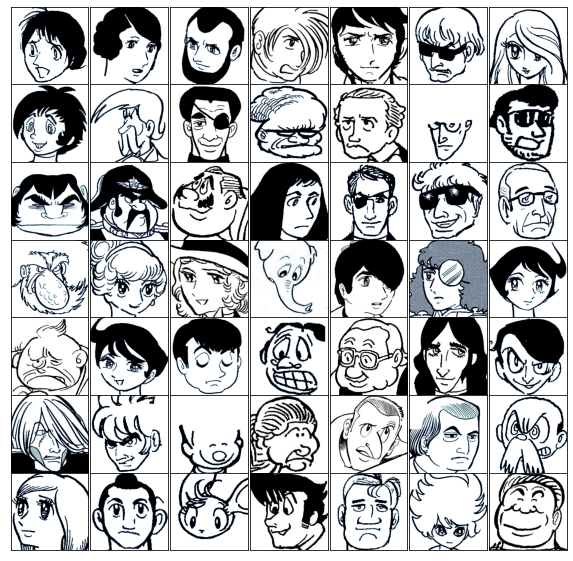

In [254]:
# filesに何を入れるか？
files = a[:50]

# タイル状に pm × pm 枚配置
pm = 7
d = []
for i in files:
    img = Image.open(i)
    img = np.asarray(img)
    d.append(img)
# タイル状に画像を一覧表示
fig, ax = plt.subplots(pm, pm, figsize=(10, 10))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(pm):
    for j in range(pm):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(d[pm*i+j], cmap="bone")
plt.show()